In [104]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [105]:
with open('../tracker_stub/player_detections8.pkl', 'rb') as f:
    data = pickle.load(f)

with open('../tracker_stub/court_keypoints8.pkl', 'rb') as f:
    court_keypoints = pickle.load(f)

In [106]:
court_keypoints=court_keypoints[0].tolist() 

In [107]:
data

[{1: [899.057861328125,
   503.7186279296875,
   1029.319091796875,
   678.6136474609375],
  2: [5.187919616699219,
   331.8739318847656,
   93.83300018310547,
   397.2510681152344],
  3: [609.10888671875, 117.149658203125, 646.917724609375, 186.94146728515625],
  4: [570.957275390625,
   124.78106689453125,
   607.45068359375,
   246.52398681640625],
  5: [798.0999755859375,
   109.30596923828125,
   846.2593994140625,
   186.34710693359375],
  6: [409.1302795410156,
   115.17550659179688,
   446.2503967285156,
   185.34072875976562],
  7: [302.4239501953125,
   91.63214111328125,
   329.57086181640625,
   183.33456420898438],
  9: [909.07666015625,
   94.15937805175781,
   942.343994140625,
   183.21607971191406]},
 {1: [897.9494018554688,
   504.655029296875,
   1029.3162841796875,
   678.6268920898438],
  2: [5.180932521820068,
   331.85784912109375,
   93.84896850585938,
   397.2417297363281],
  3: [609.3259887695312,
   117.20482635498047,
   646.9113159179688,
   186.85853576660

In [108]:
df = pd.DataFrame(data)

# Splitting each list in the columns into separate columns
df_expanded = pd.concat([df[col].apply(pd.Series) for col in df.columns], axis=1)

# Renaming the columns to reflect the original column names and their new index
df_expanded.columns = [f'{orig_col}_{i+1}' for orig_col in df.columns for i in range(4)]

# Replacing NaN values with zero
df_expanded = df_expanded.fillna(0)

# Converting all values to integers
df_expanded = df_expanded.astype(int)

# Displaying the resulting DataFrame
print(df_expanded)


     1_1  1_2   1_3  1_4  2_1  2_2  2_3  2_4  3_1  3_2  ...  10_3  10_4  31_1  \
0    899  503  1029  678    5  331   93  397  609  117  ...     0     0     0   
1    897  504  1029  678    5  331   93  397  609  117  ...     0     0     0   
2    897  505  1029  678    5  331   93  397  609  117  ...     0     0     0   
3    897  503  1029  678    5  331   93  397  609  117  ...     0     0     0   
4    897  500  1029  676    5  331   94  397  608  117  ...  1148   275     0   
..   ...  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
839  972  312  1029  463    0  336   88  400  603  100  ...  1147   281     0   
840  973  312  1030  461    0  337   88  400  603  100  ...  1147   283     0   
841  972  311  1033  461    0  339   87  400  602  100  ...  1146   283     0   
842  976  312  1037  459    0  340   86  400  601  100  ...  1145   286     0   
843  986  311  1039  459    0  340   84  400  600  100  ...  1143   284     0   

     31_2  31_3  31_4  33_1

In [109]:
# Group the columns by the first number in their names
grouped_columns = df_expanded.columns.to_series().groupby(lambda x: x.split('_')[0])

# Convert the grouped columns to a dictionary for easier access
grouped_columns_dict = {group: list(columns) for group, columns in grouped_columns}

# Display the grouped columns
for group, columns in grouped_columns_dict.items():
    print(f"Group {group}: {columns}")

# Initialize variables to store the chosen columns and their unique counts
chosen_columns = {}
unique_counts = {}

# Iterate over the groups
for group, columns in grouped_columns_dict.items():
    # Find the column with the maximum number of unique values in the group
    max_unique_column = max(columns, key=lambda x: df_expanded[x].nunique())
    
    # Store the chosen column and its unique count
    chosen_columns[group] = max_unique_column
    unique_counts[group] = df_expanded[max_unique_column].nunique()

# Sort the groups based on their unique counts in descending order
sorted_groups = sorted(unique_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top two groups
top_two_groups = sorted_groups[:2]

# Display the top two groups and their chosen columns
for group, unique_count in top_two_groups:
    print(f"Group {group} - Unique Count: {unique_count}, Chosen Column: {chosen_columns[group]}")

# Initialize variables to store column names from top two groups
columns_top_groups = []

# Iterate over the top two groups
for group, chosen_column in top_two_groups:
    # Extract column names from the group
    columns_top_groups.extend(grouped_columns_dict[group])

# Display the column names from the top two groups
print("Columns from top two groups:")
print(columns_top_groups)

df_expanded[columns_top_groups]

Group 1: ['1_1', '1_2', '1_3', '1_4']
Group 10: ['10_1', '10_2', '10_3', '10_4']
Group 2: ['2_1', '2_2', '2_3', '2_4']
Group 3: ['3_1', '3_2', '3_3', '3_4']
Group 31: ['31_1', '31_2', '31_3', '31_4']
Group 33: ['33_1', '33_2', '33_3', '33_4']
Group 4: ['4_1', '4_2', '4_3', '4_4']
Group 5: ['5_1', '5_2', '5_3', '5_4']
Group 6: ['6_1', '6_2', '6_3', '6_4']
Group 7: ['7_1', '7_2', '7_3', '7_4']
Group 9: ['9_1', '9_2', '9_3', '9_4']
Group 1 - Unique Count: 432, Chosen Column: 1_3
Group 4 - Unique Count: 378, Chosen Column: 4_3
Columns from top two groups:
['1_1', '1_2', '1_3', '1_4', '4_1', '4_2', '4_3', '4_4']


,1_1,1_2,1_3,1_4,4_1,4_2,4_3,4_4
0,899,503,1029,678,570,124,607,246
1,897,504,1029,678,570,123,608,246
2,897,505,1029,678,570,124,609,246
3,897,503,1029,678,560,129,609,246
4,897,500,1029,676,566,144,608,246
...,...,...,...,...,...,...,...,...
839,972,312,1029,463,619,213,662,326
840,973,312,1030,461,615,213,657,325
841,972,311,1033,461,608,212,650,323
842,976,312,1037,459,604,210,646,327


In [110]:
df_player_positions = df_expanded[columns_top_groups]
column_mapping = {'1_1':'p1_x1','1_2':'p1_y1','1_3':'p1_x2','1_4':'p1_y2',
                  '4_1':'p2_x1','4_2':'p2_y1','4_3':'p2_x2','4_4':'p2_y2'}
df_player_positions = df_player_positions.rename(columns=column_mapping)
df_player_positions

,p1_x1,p1_y1,p1_x2,p1_y2,p2_x1,p2_y1,p2_x2,p2_y2
0,899,503,1029,678,570,124,607,246
1,897,504,1029,678,570,123,608,246
2,897,505,1029,678,570,124,609,246
3,897,503,1029,678,560,129,609,246
4,897,500,1029,676,566,144,608,246
...,...,...,...,...,...,...,...,...
839,972,312,1029,463,619,213,662,326
840,973,312,1030,461,615,213,657,325
841,972,311,1033,461,608,212,650,323
842,976,312,1037,459,604,210,646,327


In [111]:
df_player_positions = df_player_positions.interpolate()
df_player_positions = df_player_positions.bfill()

In [112]:
df_player_positions['p1_mid_y'] = (df_player_positions['p1_y1'] + df_player_positions['p1_y2'])/2
df_player_positions['p1_mid_x'] = (df_player_positions['p1_x1'] + df_player_positions['p1_x2'])/2

df_player_positions['p2_mid_y'] = (df_player_positions['p2_y1'] + df_player_positions['p2_y2'])/2
df_player_positions['p2_mid_x'] = (df_player_positions['p2_x1'] + df_player_positions['p2_x2'])/2

In [113]:
df_player_positions

,p1_x1,p1_y1,p1_x2,p1_y2,p2_x1,p2_y1,p2_x2,p2_y2,p1_mid_y,p1_mid_x,p2_mid_y,p2_mid_x
0,899,503,1029,678,570,124,607,246,590.5,964.0,185.0,588.5
1,897,504,1029,678,570,123,608,246,591.0,963.0,184.5,589.0
2,897,505,1029,678,570,124,609,246,591.5,963.0,185.0,589.5
3,897,503,1029,678,560,129,609,246,590.5,963.0,187.5,584.5
4,897,500,1029,676,566,144,608,246,588.0,963.0,195.0,587.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,972,312,1029,463,619,213,662,326,387.5,1000.5,269.5,640.5
840,973,312,1030,461,615,213,657,325,386.5,1001.5,269.0,636.0
841,972,311,1033,461,608,212,650,323,386.0,1002.5,267.5,629.0
842,976,312,1037,459,604,210,646,327,385.5,1006.5,268.5,625.0


In [114]:
player1_positions = list(zip(df_player_positions['p1_mid_x'], df_player_positions['p1_mid_y']))
player2_positions = list(zip(df_player_positions['p2_mid_x'], df_player_positions['p2_mid_y']))

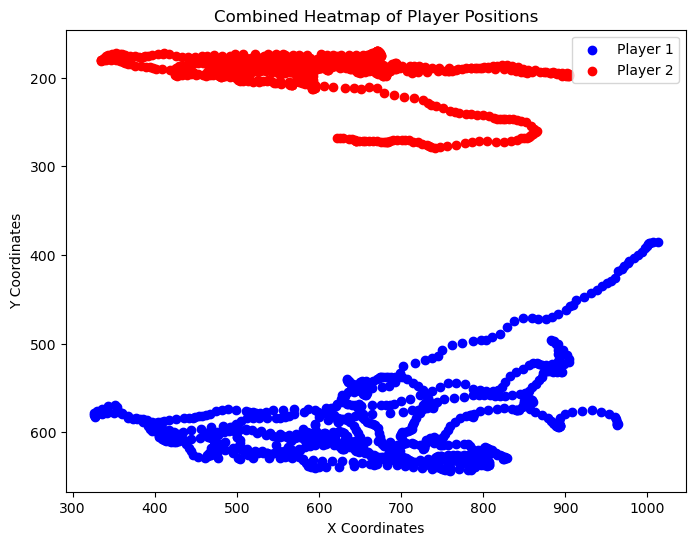

In [115]:
# Extract x and y coordinates from the list of tuples for player 1
x_coords_player1 = [coord[0] for coord in player1_positions]
y_coords_player1 = [coord[1] for coord in player1_positions]

# Extract x and y coordinates from the list of tuples for player 2
x_coords_player2 = [coord[0] for coord in player2_positions]
y_coords_player2 = [coord[1] for coord in player2_positions]

# Create a scatter plot with both sets of coordinates
plt.figure(figsize=(8, 6))

plt.scatter(x_coords_player1, y_coords_player1, c='b', alpha=1, label='Player 1')
plt.scatter(x_coords_player2, y_coords_player2, c='r', alpha=1, label='Player 2')

# Set the title and labels
plt.title('Combined Heatmap of Player Positions')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')

# Add a legend
plt.legend()


# Flip the image by inverting the x and y axis

plt.gca().invert_yaxis()

# Show the plot
plt.show()


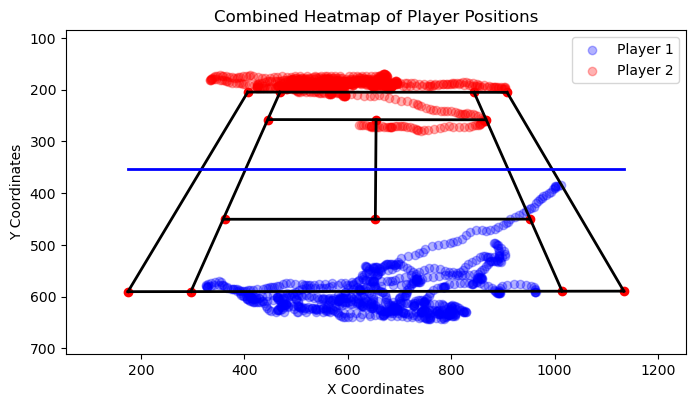

In [116]:
import matplotlib.pyplot as plt

class TennisCourt():
    def __init__(self, court_keypoints=None, connections=None, padding=50):
        self.court_keypoints = court_keypoints
        self.connections = connections
        self.padding = padding

    def draw_court(self, ax):
        # Plot court keypoints
        for i in range(0, len(self.court_keypoints), 2):
            ax.plot(self.court_keypoints[i], self.court_keypoints[i+1], 'ro')

        # Plot connections
        for connection in self.connections:
            start_point = connection[0] * 2
            end_point = connection[1] * 2
            ax.plot([self.court_keypoints[start_point], self.court_keypoints[end_point]], 
                    [self.court_keypoints[start_point+1], self.court_keypoints[end_point+1]], 
                    'k-', linewidth=2)
        
        ax.set_aspect('equal')

        # Set limits of x and y axes with padding
        ax.set_xlim(min(self.court_keypoints[::2]) - self.padding, max(self.court_keypoints[::2]) + self.padding)
        ax.set_ylim(min(self.court_keypoints[1::2]) - self.padding, max(self.court_keypoints[1::2]) + self.padding)

        # Draw the net
        net_start_point = (min(self.court_keypoints[::2]), int((min(self.court_keypoints[1::2]) + max(self.court_keypoints[1::2])) / 2))
        net_end_point = (max(self.court_keypoints[::2]), int((min(self.court_keypoints[1::2]) + max(self.court_keypoints[1::2])) / 2))
        ax.plot([net_start_point[0], net_end_point[0]], [.89*net_start_point[1], .89*net_start_point[1]], 'b-', linewidth=2)

        # Invert y-axis to flip the image upside down
        ax.invert_yaxis()

# Extract x and y coordinates from the list of tuples for player 1
x_coords_player1 = [coord[0] for coord in player1_positions]
y_coords_player1 = [coord[1] for coord in player1_positions]

# Extract x and y coordinates from the list of tuples for player 2
x_coords_player2 = [coord[0] for coord in player2_positions]
y_coords_player2 = [coord[1] for coord in player2_positions]


connections = [
    (0, 2), (4, 5), (6, 7), (1, 3),
    (0, 1), (8, 9), (10, 11), (12, 13), (2, 3)
]

# Create a TennisCourt instance with court keypoints, connections, and padding
tennis_court = TennisCourt(court_keypoints=court_keypoints, connections=connections, padding=120)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw the tennis court
tennis_court.draw_court(ax)

# Overlay the scatter plot with player positions
ax.scatter(x_coords_player1, y_coords_player1, c='b', alpha=0.3, label='Player 1')
ax.scatter(x_coords_player2, y_coords_player2, c='r', alpha=0.3, label='Player 2')


# Set the title and labels
ax.set_title('Combined Heatmap of Player Positions')
ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')

# Add a legend
ax.legend()

# Show the plot
plt.show()
